In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Data Exploration

### Import dataset

In [6]:
df_customers = pd.read_csv('../Data Files/customers.csv')
df_customers.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
df_customers.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


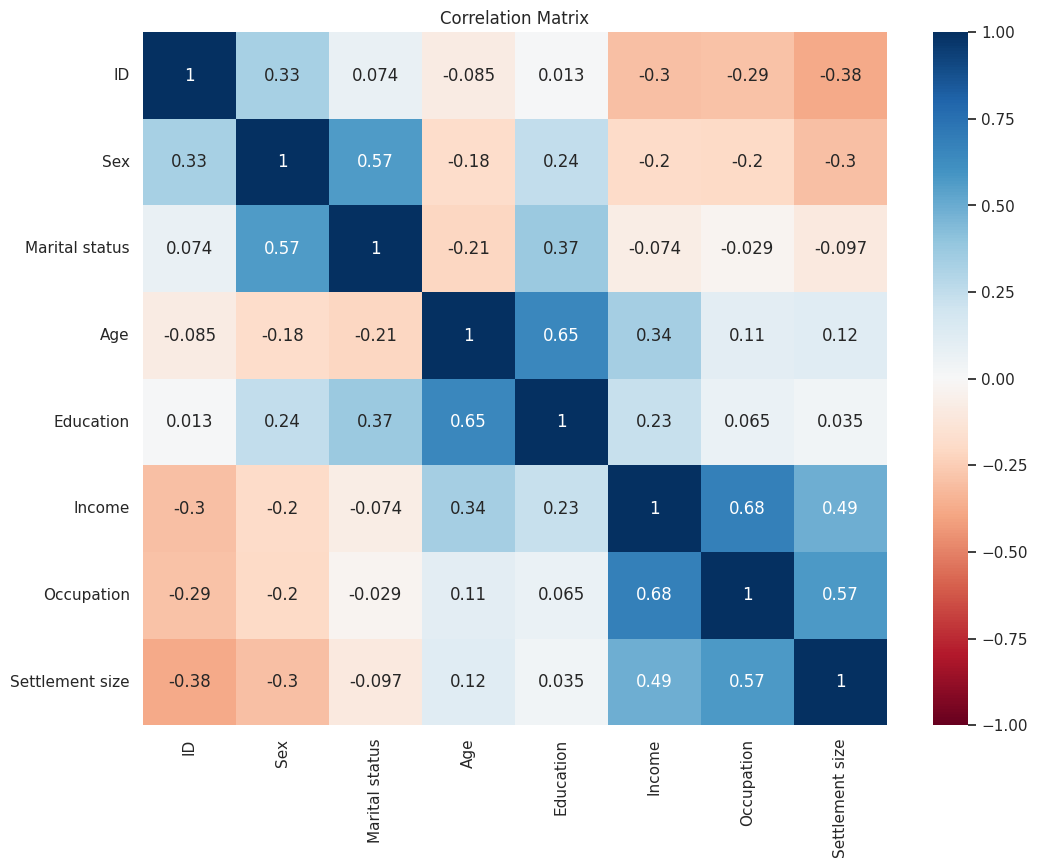

In [8]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_customers.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.title('Correlation Matrix')
plt.show()

### Standardize the dataframe

In [24]:
df_customers_id = df_customers.copy()
df_customers = df_customers.drop('ID',axis = 1)

In [25]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(df_customers)

In [27]:
customers_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

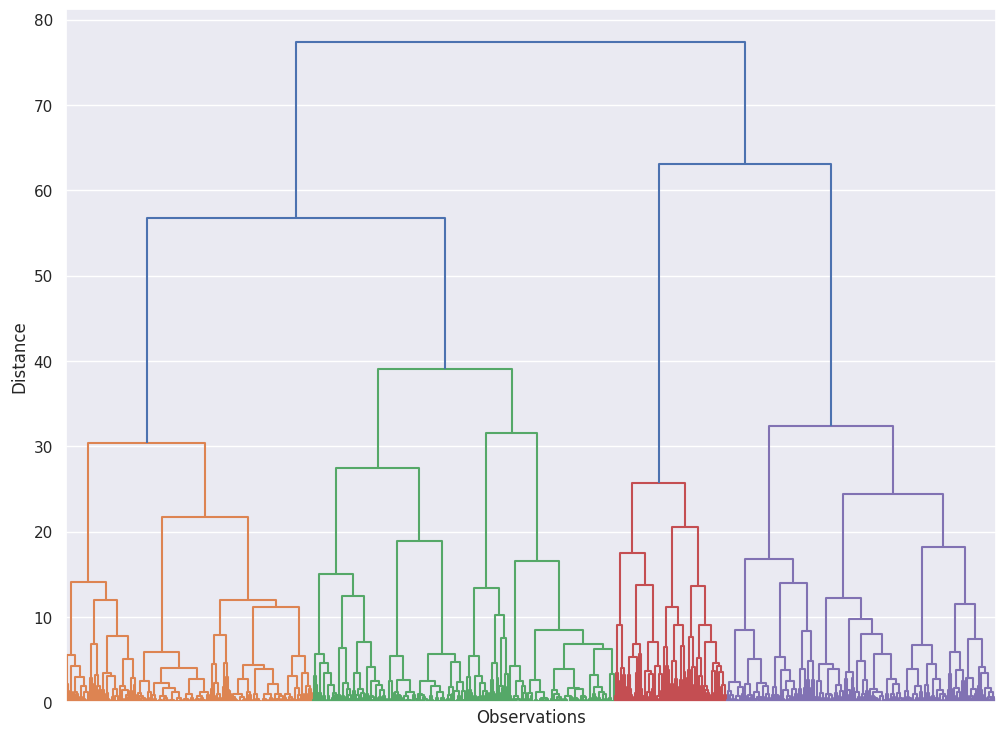

In [28]:
h_cluster = linkage(customers_std, method='ward')

plt.figure(figsize=(12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(h_cluster,
           show_leaf_counts=False,
           no_labels=True)
plt.show()

### K-means clustering

#### Elbow method

In [29]:
results = {}

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(customers_std)
    results[i] = kmeans.inertia_

/home/victor/anaconda3/envs/opt-price0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/victor/anaconda3/envs/opt-price0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/victor/anaconda3/envs/opt-price0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/victor/anaconda3/envs/opt-price0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

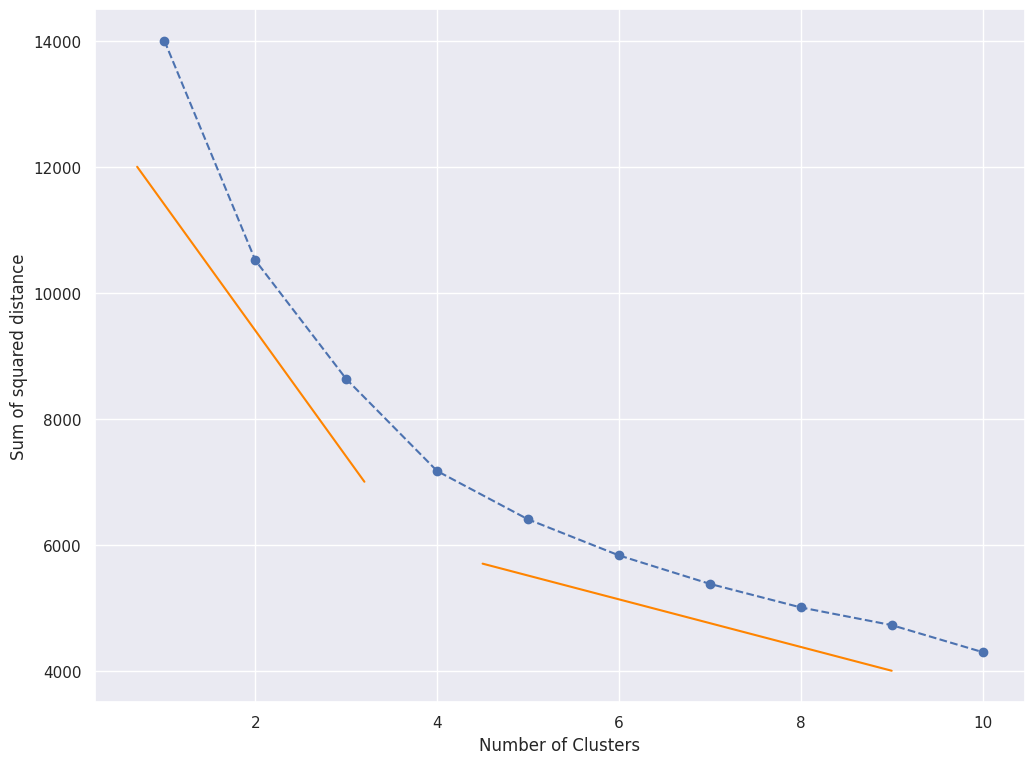

In [30]:
plt.figure(figsize=(12, 9))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.plot([0.7, 3.2], [12000, 7000], color='#FF8400')
plt.plot([4.5, 9], [5700, 4000], color='#FF8400')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### K-means clustering with 4 clusters

In [31]:
kmeans = KMeans(n_clusters= 4, init= 'k-means++', random_state=42)
kmeans.fit(customers_std)

/home/victor/anaconda3/envs/opt-price0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = kmeans.labels_
df_customers_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,1
1996,1,1,27,1,117744,1,0,2
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,2


In [33]:
df_customers_analysis = df_customers_kmeans.groupby('Segment').mean().round(3)
df_customers_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.502,0.692,55.703,2.129,158338.422,1.129,1.110
1,0.353,0.019,35.578,0.747,97859.853,0.329,0.043
2,0.854,0.997,28.963,1.068,105759.119,0.634,0.423
3,0.030,0.174,35.635,0.733,141218.249,1.272,1.523


In [34]:
df_customers_analysis['Count'] = df_customers_kmeans[['Segment', 'Sex']].groupby('Segment').count()
df_customers_analysis['%'] = df_customers_analysis['Count'] / df_customers_analysis['Count'].sum()
df_customers_analysis.rename(index={
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
}, inplace=True)

df_customers_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Count,%
Segment,,,,,,,,,
well-off,0.502,0.692,55.703,2.129,158338.422,1.129,1.110,263,0.1315
fewer-opportunities,0.353,0.019,35.578,0.747,97859.853,0.329,0.043,462,0.2310
standard,0.854,0.997,28.963,1.068,105759.119,0.634,0.423,705,0.3525
career-focused,0.030,0.174,35.635,0.733,141218.249,1.272,1.523,570,0.2850


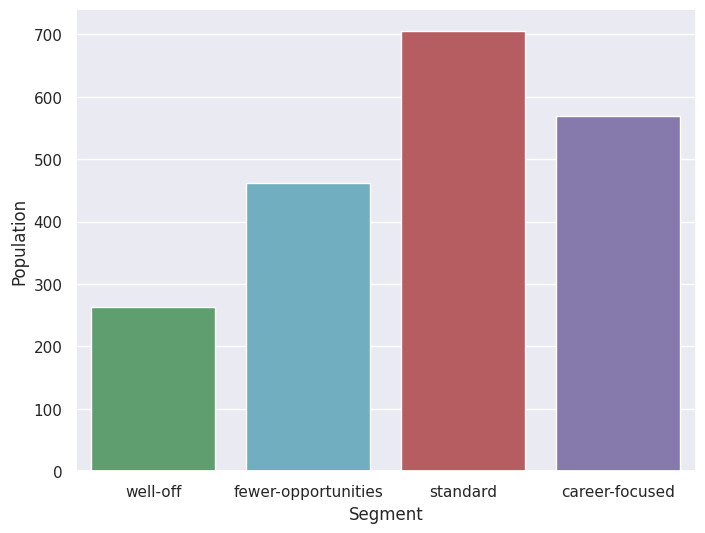

In [35]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_customers_analysis, x=df_customers_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

In [36]:
df_customers_kmeans['Segment'] = df_customers_kmeans['Segment'].map({
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
})
df_customers_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,0,0,67,2,124670,1,2,well-off
1,1,1,22,1,150773,1,2,standard
2,0,0,49,1,89210,0,0,fewer-opportunities
3,0,0,45,1,171565,1,1,career-focused
4,0,0,53,1,149031,1,1,career-focused
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,fewer-opportunities
1996,1,1,27,1,117744,1,0,standard
1997,0,0,31,0,86400,0,0,fewer-opportunities
1998,1,1,24,1,97968,0,0,standard


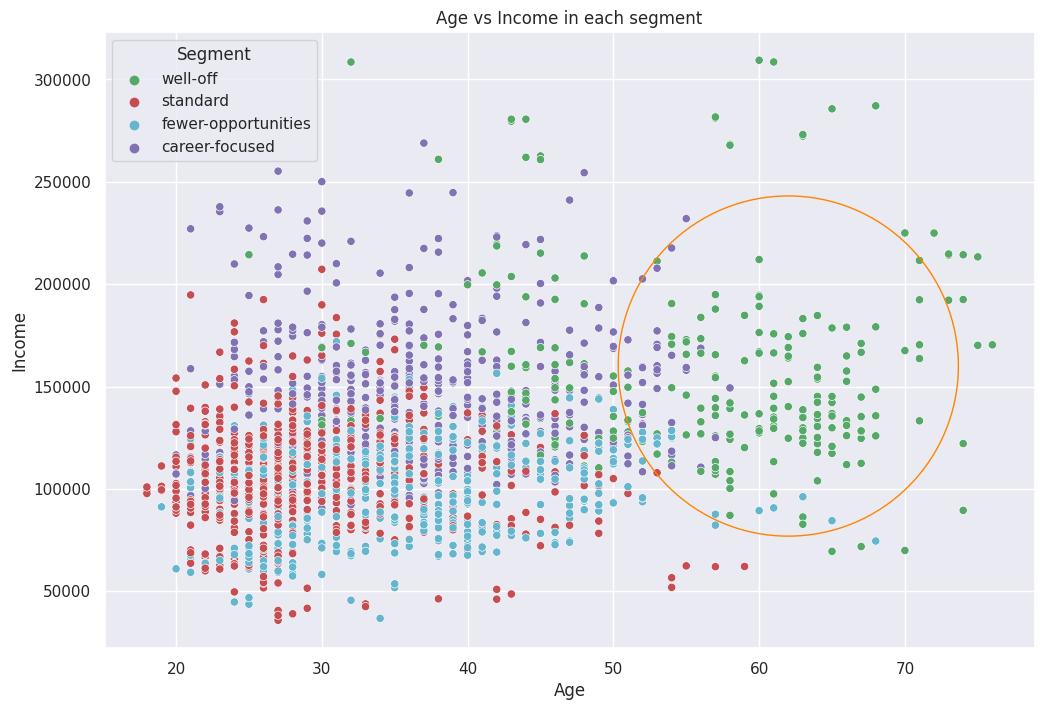

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_customers_kmeans['Age'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(62, 160000 , s=60000, facecolors='none', edgecolors='#FF8400' ) 
plt.title('Age vs Income in each segment')
plt.show()

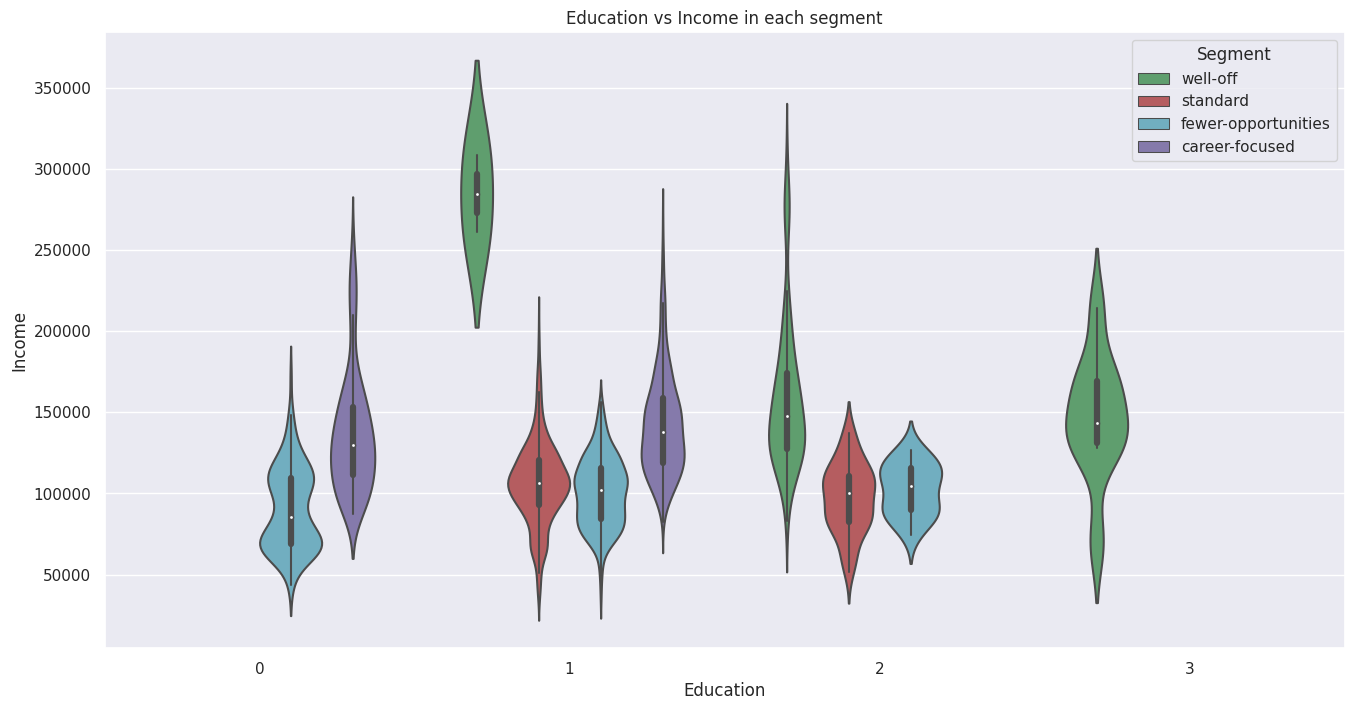

In [38]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    x=df_customers_kmeans['Education'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.title('Education vs Income in each segment')
plt.show()

### K-means with PCA

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_std)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

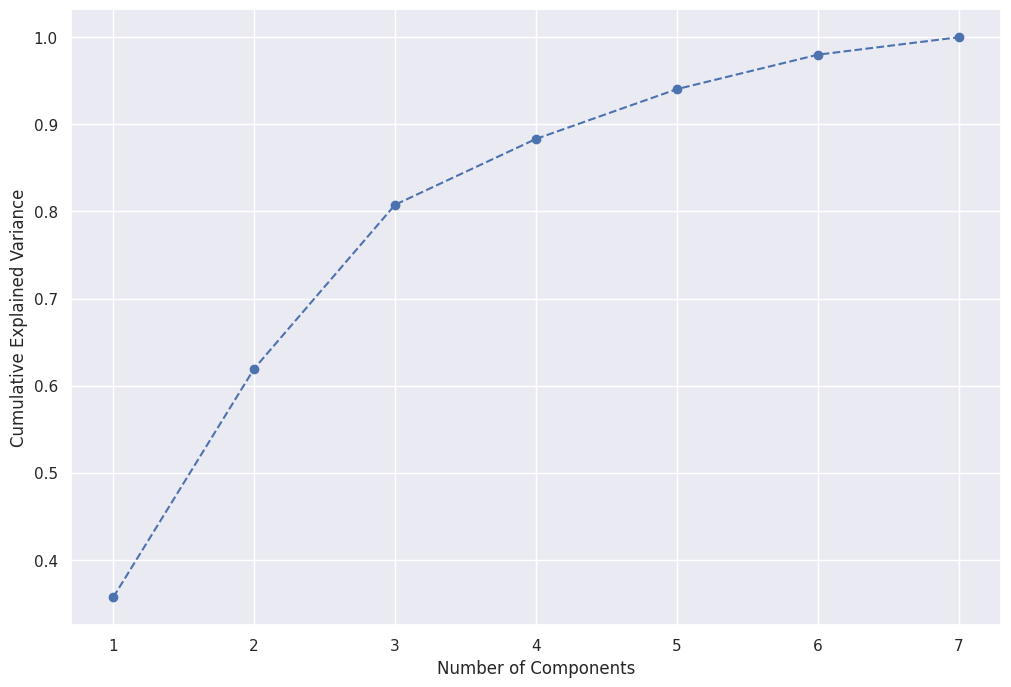

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [42]:
pca = PCA(n_components=3)
pca.fit(customers_std)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df_customers.columns.values,
    index=['component 1', 'component 2', 'component 3'])

df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.3147,-0.1917,0.3261,0.1568,0.5245,0.4921,0.4648
component 2,0.4580,0.5126,0.3122,0.6398,0.1247,0.0147,-0.0696
component 3,-0.2930,-0.4420,0.6095,0.2756,-0.1657,-0.3955,-0.2957


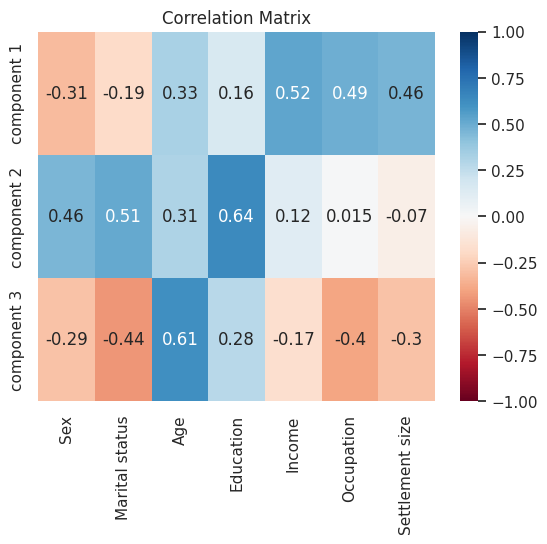

In [43]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

In [44]:
pca_scores = pca.transform(customers_std)

kmeans_pca = KMeans(n_clusters=4, init=  'k-means++',random_state=42)
kmeans_pca.fit(pca_scores)

/home/victor/anaconda3/envs/opt-price0/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [45]:
df_segm_pca = pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2', 'component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [48]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3
K-means PCA,,,,,,,,,,
0,0.9003,0.9653,28.8786,1.0607,107551.5000,0.6777,0.4408,-1.1070,0.7038,-0.7814
1,0.0274,0.1681,35.7376,0.7341,141525.8268,1.2676,1.4803,1.3727,-1.0462,-0.2480
2,0.3065,0.0957,35.3130,0.7609,93692.5674,0.2522,0.0391,-1.0464,-0.9030,1.0036
3,0.5057,0.6906,55.6792,2.1283,158019.1019,1.1208,1.1019,1.6873,2.0312,0.8440


In [50]:
df_segm_pca_analysis['Count'] = df_segm_pca[['K-means PCA', 'Sex']].groupby(['K-means PCA']).count()
df_segm_pca_analysis['%'] = df_segm_pca_analysis['Count'] / df_segm_pca_analysis['Count'].sum()
df_segm_pca_analysis.rename(index={
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
}, inplace=True)

df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,Count,%
K-means PCA,,,,,,,,,,,,
standard,0.9003,0.9653,28.8786,1.0607,107551.5000,0.6777,0.4408,-1.1070,0.7038,-0.7814,692,0.3460
career-focused,0.0274,0.1681,35.7376,0.7341,141525.8268,1.2676,1.4803,1.3727,-1.0462,-0.2480,583,0.2915
fewer-opportunities,0.3065,0.0957,35.3130,0.7609,93692.5674,0.2522,0.0391,-1.0464,-0.9030,1.0036,460,0.2300
well-off,0.5057,0.6906,55.6792,2.1283,158019.1019,1.1208,1.1019,1.6873,2.0312,0.8440,265,0.1325


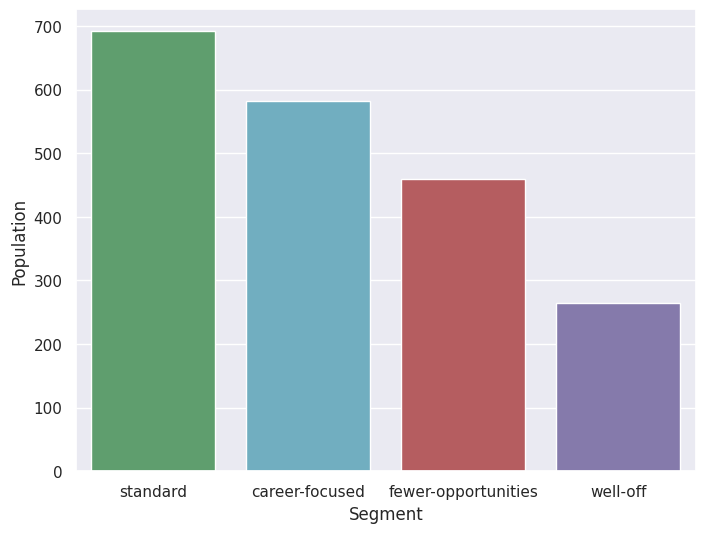

In [51]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

In [52]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
})
df_segm_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA,Segment
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer-opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career-focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer-opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer-opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


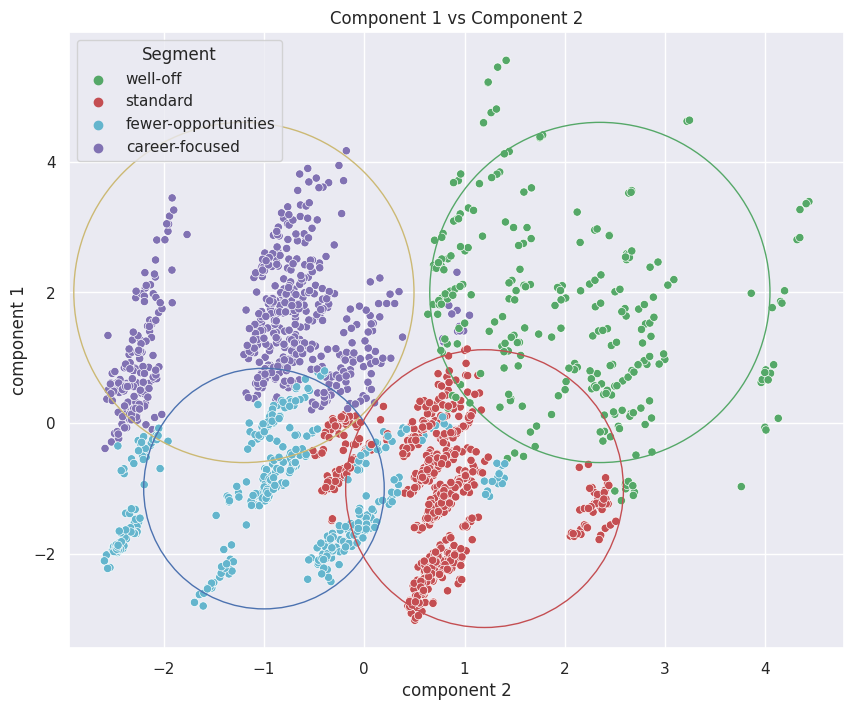

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 1'],
    hue=df_segm_pca['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 2')
plt.show()

In [56]:
df_segm_pca.to_csv('../Data Files/customers_segmentation.csv')